In [1]:
import numpy as np
import matplotlib.pyplot as plt
import saqqara
from simulator import LISA_AET

/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
config = saqqara.load_settings("default_config.yaml")

In [3]:
config

{'model': {'name': 'noise_variation',
  'fmin': 3e-05,
  'fmax': 0.5,
  'deltaf': 1e-06,
  'ngrid': 1000,
  'noise_approx': False},
 'priors': {'amp': [-13.0, -8.0],
  'tilt': [-5.0, 5.0],
  'TM': [0.0, 6.0],
  'OMS': [0.0, 30.0]},
 'run': {'verbose': False, 'simulate': False, 'train': False, 'infer': False},
 'simulate': {'store_name': 'data_store',
  'store_size': 100000,
  'chunk_size': 500},
 'train': {'trainer_dir': 'training_dir',
  'train_fraction': 0.85,
  'train_batch_size': 2048,
  'val_batch_size': 2048,
  'num_workers': 0,
  'device': 'cpu',
  'n_devices': 1,
  'min_epochs': 1,
  'max_epochs': 100,
  'early_stopping_patience': 7,
  'learning_rate': 7e-05,
  'num_features': 3},
 'infer': {'prior_samples': 100000, 'observation': 'None'}}

In [4]:
sim = LISA_AET(config)

Detector setup complete
Noise matrices computed
Response computed
Coarse graining setup complete


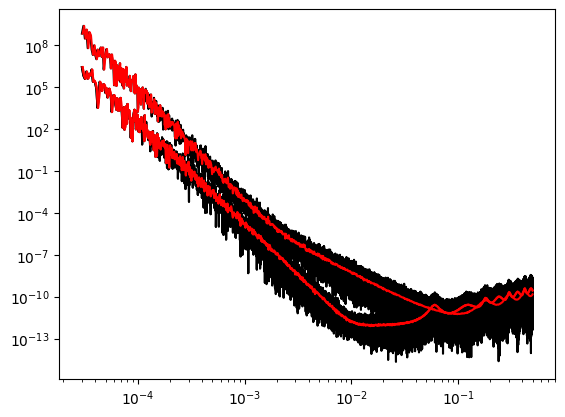

In [15]:
sample = sim.sample()
plt.loglog(sim.f_vec, sample['quadratic_data_AET'] / sim.response_AET, c='k')
plt.loglog(sim.coarse_grained_f, sample['coarse_grained_data'], c='r')

In [16]:
sim.sample(10)

  0%|          | 0/10 [00:00<?, ?it/s]/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  return bound(*args, **kwds)
100%|██████████| 10/10 [00:12<00:00,  1.23s/it]


Samples({'z': array([[-1.2871029e+01, -2.2356563e+00,  4.2345171e+00,  2.5640717e+01],
       [-1.1348470e+01,  3.7094481e+00,  3.0623136e+00,  2.0215431e+01],
       [-1.1401054e+01,  1.8947221e-02,  5.3405437e+00,  6.6050549e+00],
       [-8.6059523e+00, -1.4595954e+00,  2.7276809e+00,  2.0137413e+01],
       [-1.0100021e+01,  6.7613786e-01,  5.0602925e-01,  1.1765886e+01],
       [-8.5282164e+00,  1.0537134e+00,  4.4384642e+00,  5.0019854e-01],
       [-9.8863840e+00,  2.5046792e+00,  5.7213240e+00,  6.1990972e+00],
       [-1.0388319e+01,  1.6194407e+00,  4.6043377e+00,  2.0383099e-01],
       [-1.1382321e+01, -4.6980057e+00,  4.5870137e+00,  2.6736298e+01],
       [-9.9603405e+00,  4.4656854e+00,  3.8586729e+00,  2.0402248e+01]],
      dtype=float32), 'quadratic_signal_AET': array([[[[1.38244517e-11+5.99075076e-30j,
          0.00000000e+00+0.00000000e+00j,
          0.00000000e+00+0.00000000e+00j],
         [0.00000000e+00+0.00000000e+00j,
          1.38213971e-11-2.49475861e-30j

In [8]:
np.cumsum(sample['quadratic_data_AET'])

array([6.76269572e-10+1.61023348e-34j, 9.03952140e-10+9.39675816e-35j,
       9.03952140e-10+9.39675816e-35j, ...,
       3.27339077e-03-5.31963657e-29j, 3.27340901e-03-5.31963671e-29j,
       3.27342224e-03-5.31963752e-29j])

/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  return bound(*args, **kwds)
/Users/james/Code/public_releases/saqqara/examples/noise_variation/simulator.py:353: ComplexWarning: Casting complex values to real discards the imaginary part
  out[counter, j] = np.mean(


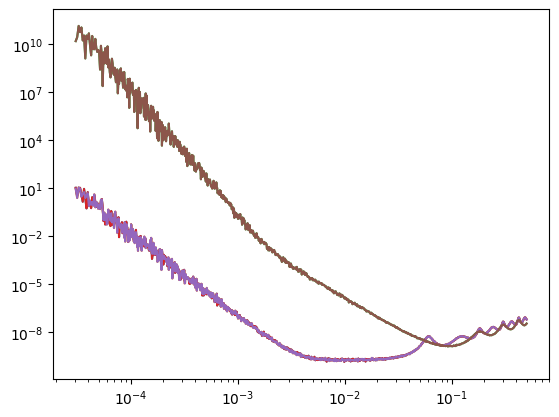

In [6]:
cg = sim.generate_coarse_grained_data_from_sum(sample["quadratic_data_AET"])
cg_slow = sim.generate_coarse_grained_data(sample["quadratic_data_AET"])


In [15]:
np.any((sim.f_vec < sim.coarse_grained_bins[1]) & (sim.f_vec >= sim.coarse_grained_bins[0]))

Array(True, dtype=bool)

In [6]:
len(sim.lengths)

944

In [5]:
sim.graph.nodes.keys()
shapes, dtypes = sim.get_shapes_and_dtypes()
print(shapes)

/Users/james/Code/public_releases/saqqara/examples/noise_variation/simulator.py:300: ComplexWarning: Casting complex values to real discards the imaginary part
  out[i, j] = np.mean(


{'z': (4,), 'quadratic_signal_AET': (499971, 3, 3), 'quadratic_TM_AET': (499971, 3, 3), 'quadratic_OMS_AET': (499971, 3, 3), 'quadratic_noise_AET': (499971, 3, 3), 'quadratic_data_AET': (499971, 3), 'coarse_grained_data': (945, 3)}


In [6]:
response_AET = np.array(
    [
        sim.AA_interpolator(
            sim.coarse_grained_f[:-1] + np.diff(sim.coarse_grained_f) / 2
        ),
        sim.EE_interpolator(
            sim.coarse_grained_f[:-1] + np.diff(sim.coarse_grained_f) / 2
        ),
        sim.TT_interpolator(
            sim.coarse_grained_f[:-1] + np.diff(sim.coarse_grained_f) / 2
        ),
    ]
).T

/Users/james/Code/public_releases/saqqara/examples/noise_variation/simulator.py:300: ComplexWarning: Casting complex values to real discards the imaginary part
  out[i, j] = np.mean(
/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)


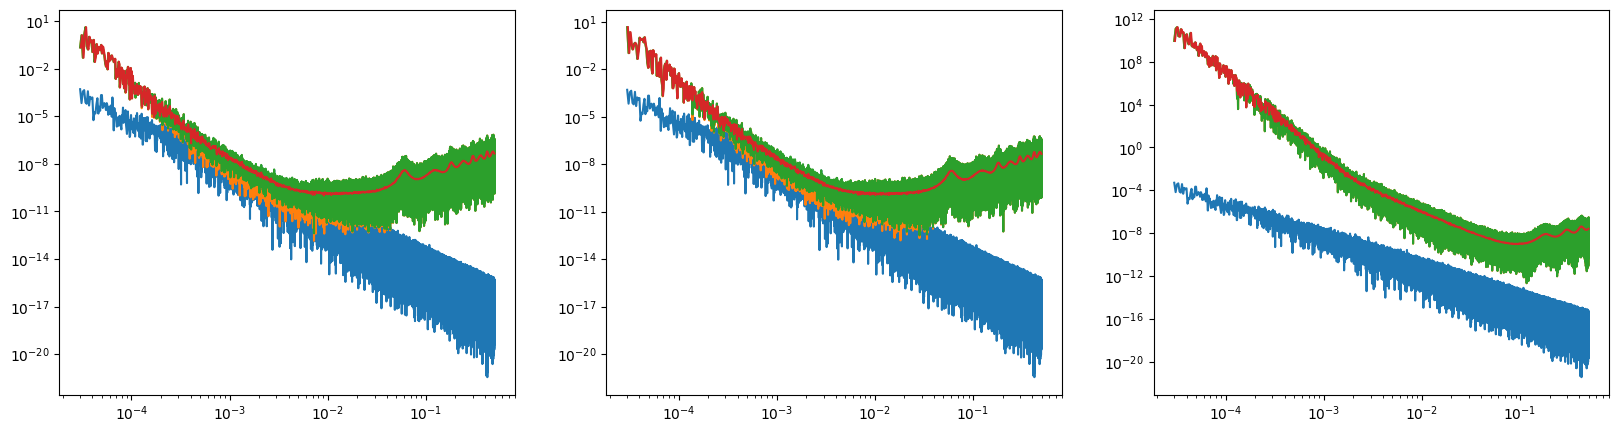

In [8]:
sample = sim.sample(conditions={"z": np.array([-11.0, 0.0, 3.0, 15.0])})
fig = plt.figure(figsize=(20, 5))
for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.loglog(
        sim.f_vec, sample["quadratic_signal_AET"][:, i, i] / sim.response_AET[:, i]
    )
    plt.loglog(
        sim.f_vec, sample["quadratic_noise_AET"][:, i, i] / sim.response_AET[:, i]
    )
    plt.loglog(sim.f_vec, sample["quadratic_data_AET"][:, i] / sim.response_AET[:, i])
    plt.loglog(
        sim.coarse_grained_f,
        sample["coarse_grained_data"][:, i],
    )

In [ ]:
sample = sim.sample(10, targets=["quadratic_data_AET"])

100%|██████████| 10/10 [00:13<00:00,  1.35s/it]


In [18]:
cg_slow = sim.generate_coarse_grained_data(sample["quadratic_data_AET"][0])

/Users/james/Code/public_releases/saqqara/examples/noise_variation/simulator.py:302: ComplexWarning: Casting complex values to real discards the imaginary part
  out[i, j] = np.mean(
/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


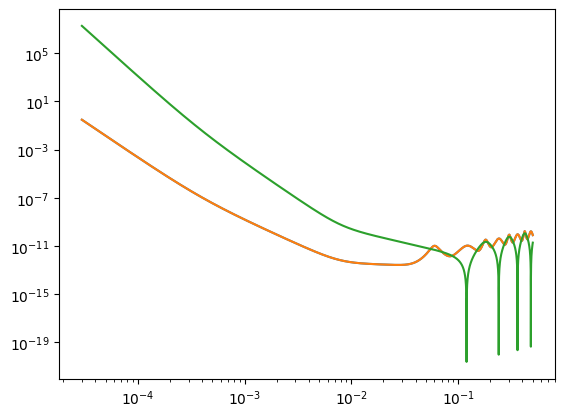

In [53]:
plt.loglog(sim.f_vec, np.diagonal(sim.TM_tdi_matrix, axis1=1, axis2=2) / sim.response_AET)

[4.23437778e-08 4.22709122e-08 2.67533622e-08]
[-10.0, 0.0, 3.0, 15.0]


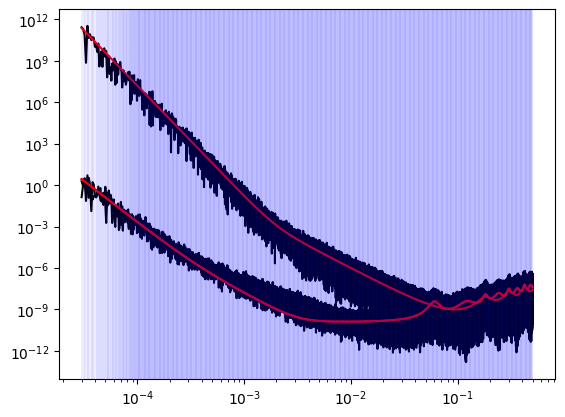

In [9]:
full_sample = sim.sample(conditions={"z": [-10., 0.0, 3.0, 15.]}, targets=["quadratic_data_AET"])
sample = np.real(full_sample["quadratic_data_AET"])
normalisation = np.real(np.diagonal(3**2 * sim.TM_tdi_matrix + 15**2 * sim.OMS_tdi_matrix, axis1=1, axis2=2) / sim.response_AET)
print(normalisation[-1, :])
#cg_slow = sim.generate_coarse_grained_data(sample)
# temp_noise = np.diagonal(sim.sample(
#     targets=["quadratic_noise_AET"], conditions={"z": np.array([-11.0, 0.0, 3.0, 15.0])}
# )["quadratic_noise_AET"], axis1=1, axis2=2)
data = sample / sim.response_AET
plt.loglog(sim.f_vec, data, c='k')
plt.loglog(sim.f_vec, normalisation, c='r')
for freq in sim.coarse_grained_f:
    plt.axvline(freq, c='b', lw=0.1)
print(full_sample['z'])

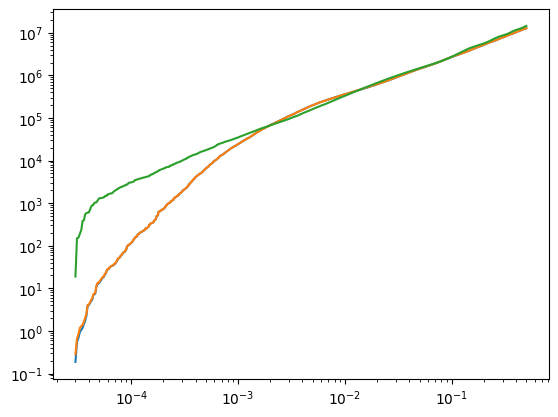

In [63]:
# cumulative_sum = np.cumsum(data, axis=0, dtype=np.float64)
# cumulative_sum.shape
# plt.loglog(sim.f_vec, cumulative_sum)

In [5]:
indices = [0,]
norm_matrix = np.zeros((len(sim.f_vec), 3))
cg_norm_matrix = np.zeros((len(sim.coarse_grained_f), 3))
for idx in range(len(sim.coarse_grained_bins) - 1):
    if idx != len(sim.coarse_grained_bins) - 2:
        mask = (sim.f_vec >= sim.coarse_grained_bins[idx]) & (
            sim.f_vec < sim.coarse_grained_bins[idx + 1]
        )
        print(len(sim.f_vec[mask]))
    else:
        mask = (sim.f_vec >= sim.coarse_grained_bins[idx]) 
    max_idx = np.argmax(np.cumsum(mask))
    norm_matrix[mask, :] = np.real(normalisation[max_idx, :])
    cg_norm_matrix[idx, :] = np.real(normalisation[max_idx, :])
    indices.append(int(max_idx))

indices = np.array(indices)
index_pairs = np.concatenate([indices[:-1, None], indices[1:, None]], axis=1)

NameError: name 'sim' is not defined

In [11]:
np.where(index_pairs[:, 1] - index_pairs[:, 0] == 0)

(array([0]),)

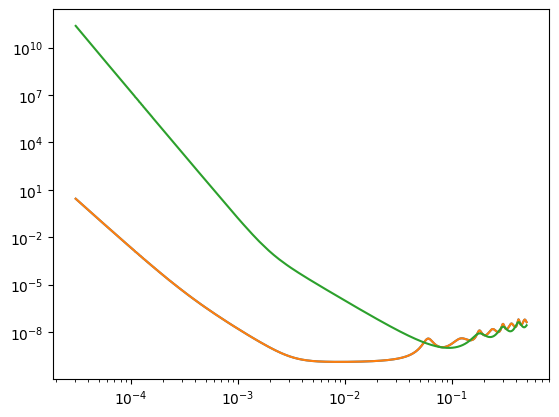

In [14]:
plt.loglog(sim.coarse_grained_f, cg_norm_matrix)

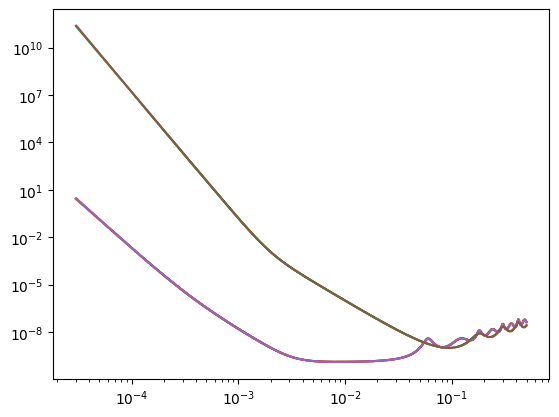

In [26]:
plt.loglog(sim.f_vec, norm_matrix)
plt.loglog(sim.coarse_grained_f, cg_norm_matrix)

In [15]:
norm_matrix.shape

(499971, 3)

/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


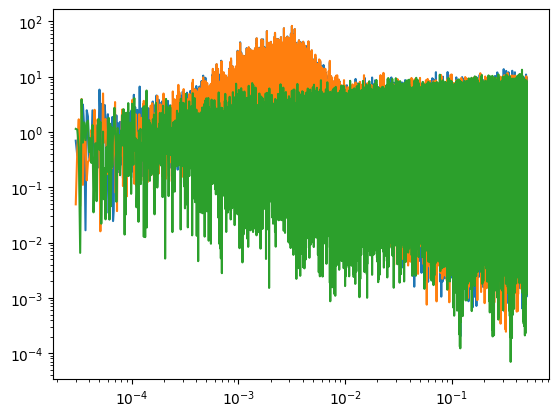

In [17]:
plt.loglog(sim.f_vec, data / norm_matrix)

/Users/james/Code/mambaforge/envs/saqqara-3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: ComplexWarning: Casting complex values to real discards the imaginary part
  return bound(*args, **kwds)


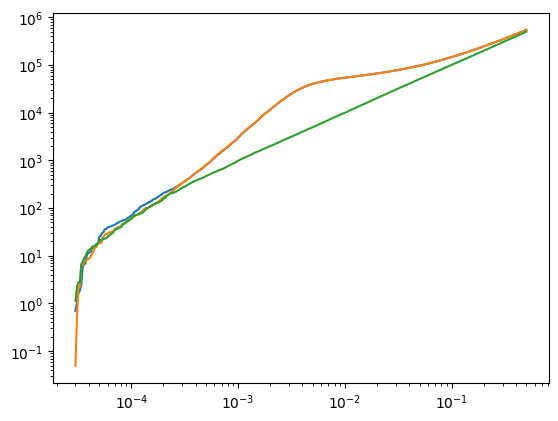

In [18]:
cumulative_sum = np.cumsum(data / norm_matrix, axis=0, dtype=np.float64)
cumulative_sum.shape
plt.loglog(sim.f_vec, cumulative_sum)

In [14]:
index_pairs.shape

(945, 2)

In [15]:
index_pairs[-1]

array([495128, 499970])

In [19]:
sums = cumulative_sum[index_pairs[:, 1]] * cg_norm_matrix - cumulative_sum[index_pairs[:, 0]] * cg_norm_matrix

In [20]:
lengths = index_pairs[:, 1] - index_pairs[:, 0]
means = sums / lengths[:, None]

/var/folders/rr/6sbz4k1945v0s9xvs3ldc3ch0000gn/T/ipykernel_2445/2826037969.py:2: RuntimeWarning: invalid value encountered in divide
  means = sums / lengths[:, None]


In [106]:
# import jax.numpy as jnp
# import gw_response as gwr
# TM_tdi_matrix = jnp.abs(
#     sim.overall_rescaling
#     * gwr.noise_TM_matrix(
#         TDI_idx=1,  # AET TODO: Generatlise to arbitrary TDI combination
#         frequency=sim.coarse_grained_f,
#         TM_acceleration_parameters=jnp.ones(shape=(1, 6)),
#         arms_matrix_rescaled=sim.LISA.detector_arms(time_in_years=jnp.array([0.0]))
#         / sim.LISA.armlength,
#         x_vector=sim.LISA.x(sim.coarse_grained_f),
#     )
# )[
#     0, ...
# ]  # Extract t = 0 component (was shape (1, freqs, 3, 3))
# OMS_tdi_matrix = jnp.abs(
#     sim.overall_rescaling
#     * gwr.noise_OMS_matrix(
#         TDI_idx=1,  # AET TODO: Generatlise to arbitrary TDI combination
#         frequency=sim.coarse_grained_f,
#         OMS_parameters=jnp.ones(shape=(1, 6)),
#         arms_matrix_rescaled=sim.LISA.detector_arms(time_in_years=jnp.array([0.0]))
#         / sim.LISA.armlength,
#         x_vector=sim.LISA.x(sim.coarse_grained_f),
#     )
# )[0, ...]
# cg_normalisation = np.diagonal(TM_tdi_matrix + OMS_tdi_matrix, axis1=1, axis2=2)

In [21]:
cg_slow = sim.generate_coarse_grained_data(sample)

/Users/james/Code/public_releases/saqqara/examples/noise_variation/simulator.py:300: ComplexWarning: Casting complex values to real discards the imaginary part
  out[i, j] = np.mean(


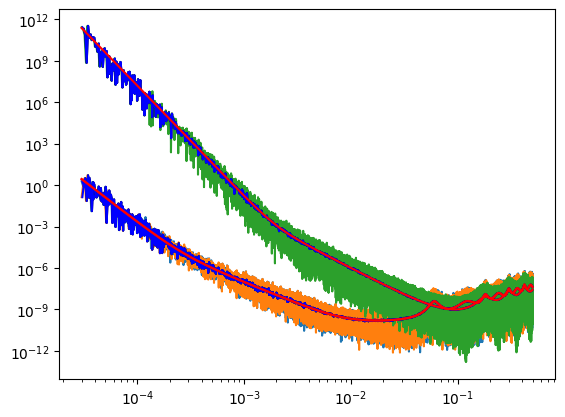

In [22]:
plt.loglog(sim.f_vec, data)
plt.loglog(sim.coarse_grained_f, means, c='k')
plt.loglog(sim.coarse_grained_f, cg_slow, c='b')
for i in range(3):
    plt.loglog(sim.f_vec, normalisation[:, i] + (sim.overall_rescaling * 1e-10 / (4 * np.pi**2 * sim.f_vec**3 / 3 / sim.Hubble_over_h**2)) , c='r')

In [49]:
np.allclose(means[1:], cg_data_masked[1:])

True

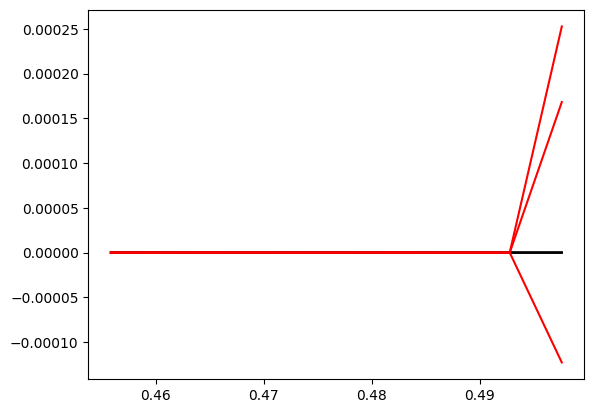

In [47]:
plt.plot(sim.coarse_grained_f[-10:],(means[-10:] - cg_data_masked[-10:])/cg_data_masked[-10:], c='k')
plt.plot(sim.coarse_grained_f[-10:],(means[-10:] - cg_slow[-10:])/cg_slow[-10:], c='r')

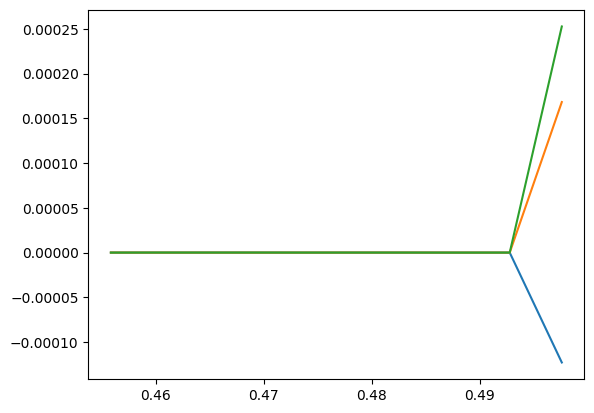

In [37]:
plt.plot(sim.coarse_grained_f[-10:],(means[-10:] - cg_slow[-10:])/cg_slow[-10:])

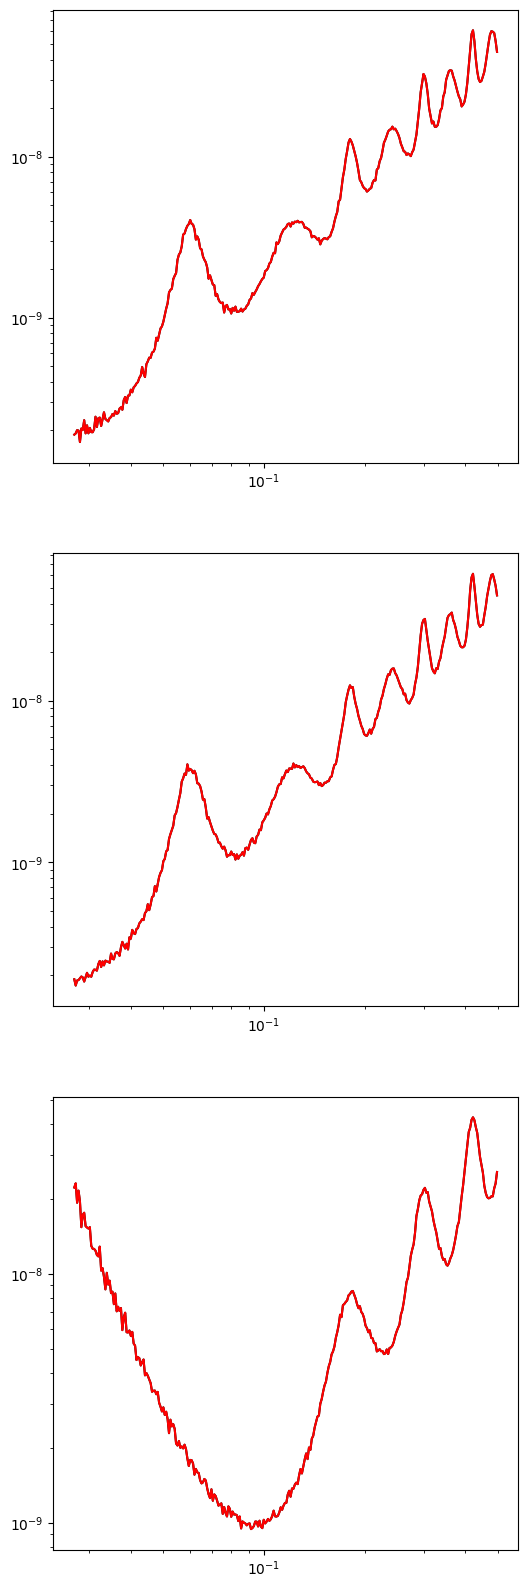

In [25]:
fig = plt.figure(figsize=(6, 20))
for i in range(3):
    ax = plt.subplot(3, 1, i + 1)
    plt.loglog(sim.coarse_grained_f[-300:], cg_slow[-300:, i], c='k')
    plt.loglog(sim.coarse_grained_f[-300:], means[-300:, i], c='r', ls='-')

In [50]:
np.isnan(means)

array([[ True,  True,  True],
       [False, False, False],
       [False, False, False],
       ...,
       [False, False, False],
       [False, False, False],
       [False, False, False]])

In [42]:
def generate_coarse_grained_data(quadratic_data_AET):
    # NOTE: The coarse-grained data is pre-divided by the response matrix
    # to go to strain units
    out = np.zeros(shape=(len(sim.coarse_grained_f), 3))

    for i in range(len(sim.coarse_grained_bins) - 1):
        if i != len(sim.coarse_grained_bins) - 2:
            mask = (sim.f_vec >= sim.coarse_grained_bins[i]) & (
                sim.f_vec < sim.coarse_grained_bins[i + 1]
            )
        else:
            mask = (sim.f_vec >= sim.coarse_grained_bins[i]) 
        for j in range(3):
            out[i, j] = np.mean(
                quadratic_data_AET[mask, j] / sim.response_AET[mask, j]
            )
    return sim.transform_samples(out)

In [44]:
cg_data_masked = generate_coarse_grained_data(sample)

/var/folders/rr/6sbz4k1945v0s9xvs3ldc3ch0000gn/T/ipykernel_2445/3275655739.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  out[i, j] = np.mean(
